### CSV
- *soba 301, 2018 godina*
- ocisceno od outliera
- Importan csv koji ima delay (Room_occupation = 1 kada je Set_temp ostala jednaka comfort temperaturi)

### PRIJELAZI
- *Crne temperature* su vecinom/uvijek postavljene
- *Zelene temperature* vrijede za prijelazna razdoblja

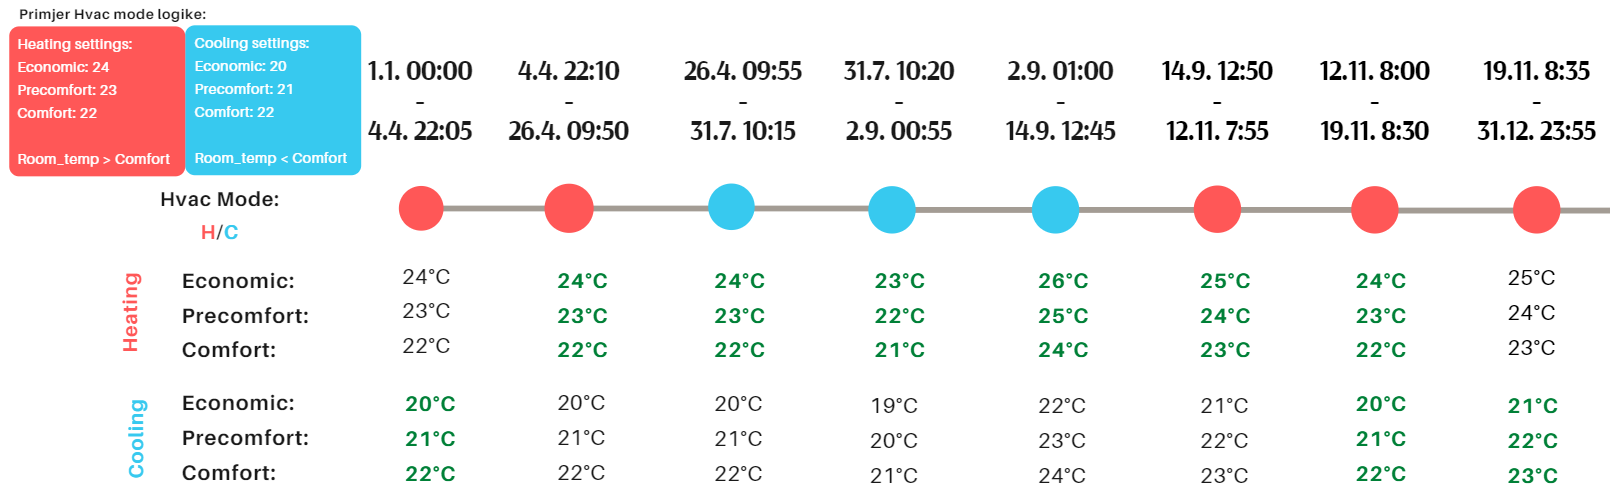

## Nove kolumne:
### Hvac_state_automatic
- Zamijenjena kolumna 'Hvac_state_manual'
- Kada je Room_occupation == 1 tada je Hvac_state_automatic == Hvac_state originalni, inače je uvijek automatski.

### Fan_automatic
- kada je rad automatski (1), kada gost upravlja (0)
- Tablica putem koje su napisani uvjeti
- Zanemareni su specificni slučajevi* (delay)
- / - označava da se zanemaruje ventil, tj. uvjet ga ne treba uključivati
- Ventili kod hladenja (negativne vrij) ne postoje tako da ih se treba zanemariti
- Dodatni uvjeti: 
                    - Kada je prozor otvoren, Fan_automatic = 1
                    - Kada je Hvac_state_automatic == 0, Fan_automatic = 1
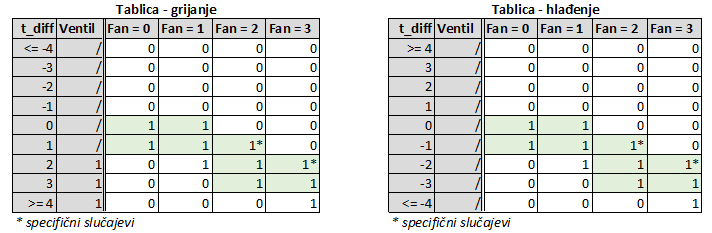

### T_fan_manual
- Kada je 0, fan radi automatski
- Kada je 1, fan radi manualno
- Invertirani Fan_automatic

### T_fan_speed
- fan_speed brzine ali backfordane (nadopunjuju praznine)
# 
_______________
##### Kolumne u planu za dodati:
##### Set_temp_mode
- označavanje Set_temp kolumne (comfort, precomfort_c, precomfort_h, economic_c, economic_h)
- nastavak _c - za hlađenje
- nastavak _h - za grijanje

##### Rented_room
- na temelju Set_temp_mode dobiva se da li je soba izdana(1) ili neizdana(0)

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv(r"C:\Users\admin\jupyter\FE\Output\Delay+newcols_2018\301.csv", parse_dates=True, infer_datetime_format=True)

In [12]:
df.drop('Hvac_state_manual', inplace=True,axis=1)
df['Hvac_state_automatic']=0
df['Fan_automatic']= 0

#HVAC_STATE_AUTOMATIC
df.loc[(df['Room_occupation'] == 1), 'Hvac_state_automatic'] = df['Hvac_state']
df.loc[(df['Room_occupation'] == 0), 'Hvac_state_automatic'] = 1

#FAN AUTOMATIC 
df.loc[(df['Window'] == 1), 'Fan_automatic'] = 1
df.loc[(df['Hvac_state_automatic'] == 0), 'Fan_automatic'] = 1

#### Uvjeti stavljeni na sva prijelazna razdoblja:

In [15]:
d1=df
start_date = '2018-01-01 00:00:00'
end_date = '2018-04-04 22:05:00'
mask = (d1['Datetime'] >= start_date) & (d1['Datetime'] <= end_date)
d1 = d1.loc[mask]

#FAN AUTOMATIC

#Tablica - Heating - pozitivne razlike
#diff 0
d1.loc[(d1['t_diff'] == 0) &  (d1['Fan_speed'] == 1), 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 0) & (d1['Fan_speed'] == 0) , 'Fan_automatic'] = 1
# #diff 1 
d1.loc[(d1['t_diff'] == 1) & (d1['Fan_speed'] == 0) , 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 1) & (d1['Fan_speed'] == 1), 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 1) & (d1['Fan_speed'] == 2) , 'Fan_automatic'] = 1
#diff 2
d1.loc[(d1['t_diff'] == 2) & (d1['Valve'] == 1) & (d1['Fan_speed'] == 1) , 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 2) & (d1['Valve'] == 1) & (d1['Fan_speed'] == 2) , 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 2) & (d1['Valve'] == 1) & (d1['Fan_speed'] == 3) , 'Fan_automatic'] = 1
#diff 3
d1.loc[(d1['t_diff'] == 3) & (d1['Fan_speed'] == 2)  & (d1['Valve'] == 1), 'Fan_automatic'] = 1
d1.loc[(d1['t_diff'] == 3) & (d1['Fan_speed'] == 3) & (d1['Valve'] == 1), 'Fan_automatic'] = 1
#diff 4<
d1.loc[(d1['t_diff'] >= 4) & (d1['Fan_speed'] == 3) & (d1['Valve'] == 1), 'Fan_automatic'] = 1

#Tablica - Cooling - negativne razlike
d1.loc[(d1['t_diff'] < 0), 'Fan_automatic'] = 0


d1

,Datetime,Set_temp,Room_temp,Hvac_state,Fan_speed,Valve,Room_occupation,Window,Humidity,Outside_temp,Irradiation,Hvac_heating,t_diff,Hvac_state_automatic,Fan_automatic
0,2018-01-01 00:05:00,21.0,22.0,1,0,0,0,0,71.00,10.00,0.0,1,-1,1,0
1,2018-01-01 00:10:00,21.0,22.0,1,0,0,0,0,71.00,10.00,0.0,1,-1,1,0
2,2018-01-01 00:15:00,21.0,22.0,1,0,0,0,0,71.00,10.00,0.0,1,-1,1,0
3,2018-01-01 00:20:00,21.0,22.0,1,0,0,0,0,71.00,10.00,0.0,1,-1,1,0
4,2018-01-01 00:25:00,21.0,22.0,1,0,0,0,0,71.00,10.00,0.0,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,2018-04-04 21:45:00,22.0,22.0,1,0,0,1,0,60.25,13.98,0.0,1,0,1,1
27028,2018-04-04 21:50:00,22.0,22.0,1,0,0,1,0,60.50,13.92,0.0,1,0,1,1
27029,2018-04-04 21:55:00,22.0,22.0,1,0,0,1,0,60.75,13.86,0.0,1,0,1,1
27030,2018-04-04 22:00:00,22.0,22.0,1,0,0,1,0,61.00,13.80,0.0,1,0,1,1


In [ ]:
d2=df
start_date = '2018-04-04 22:10:00'
end_date = '2018-04-26 09:50:00'
mask = (d2['Datetime'] >= start_date) & (d2['Datetime'] <= end_date)
d2 = d2.loc[mask]

#FAN AUTOMATIC
#Tablica - Heating - pozitivne razlike
#diff 0
d2.loc[(d2['t_diff'] == 0) &  (d2['Fan_speed'] == 1), 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 0) & (d2['Fan_speed'] == 0) , 'Fan_automatic'] = 1
# #diff 1 
d2.loc[(d2['t_diff'] == 1) & (d2['Fan_speed'] == 0) , 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 1) & (d2['Fan_speed'] == 1), 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 1) & (d2['Fan_speed'] == 2) , 'Fan_automatic'] = 1
#diff 2
d2.loc[(d2['t_diff'] == 2) & (d2['Valve'] == 1) & (d2['Fan_speed'] == 1) , 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 2) & (d2['Valve'] == 1) & (d2['Fan_speed'] == 2) , 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 2) & (d2['Valve'] == 1) & (d2['Fan_speed'] == 3) , 'Fan_automatic'] = 1
#diff 3
d2.loc[(d2['t_diff'] == 3) & (d2['Fan_speed'] == 2)  & (d2['Valve'] == 1), 'Fan_automatic'] = 1
d2.loc[(d2['t_diff'] == 3) & (d2['Fan_speed'] == 3) & (d2['Valve'] == 1), 'Fan_automatic'] = 1
#diff 4<
d2.loc[(d2['t_diff'] >= 4) & (d2['Fan_speed'] == 3) & (d2['Valve'] == 1), 'Fan_automatic'] = 1
#Tablica - Cooling - negativne razlike
d2.loc[(d2['t_diff'] < 0), 'Fan_automatic'] = 0

d2